In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inequality-in-education-around-the-world/Inequality in Education.csv


# Table of Contents

1. [Introduction to Seaborn](#Introduction-to-Seaborn)
2. [Loading and Understanding the Dataset](#Loading-and-Understanding-the-Dataset)
3. [Exploratory Data Analysis (EDA) with Seaborn](#Exploratory-Data-Analysis-(EDA)-with-Seaborn)
4. [Advanced Visualization Techniques](#Advanced-Visualization-Techniques)
5. [Conclusion](#Conclusion)


# Introduction to Seaborn

Seaborn is a powerful data visualization library built on top of Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics. Seaborn simplifies complex visualization tasks and offers a variety of built-in themes and color palettes to make your plots visually appealing.

# Loading and Understanding the Dataset

In [2]:
import pandas as pd

# Load the CSV file
dataset_file = ('/kaggle/input/inequality-in-education-around-the-world/Inequality in Education.csv')
data = pd.read_csv(dataset_file)

# Display the first few rows of the dataset
data.head()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,AFG,Afghanistan,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,ALB,Albania,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,AND,Andorra,Very High,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,ARE,United Arab Emirates,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


# Exploratory Data Analysis (EDA) with Seaborn

## Distribution Plots

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


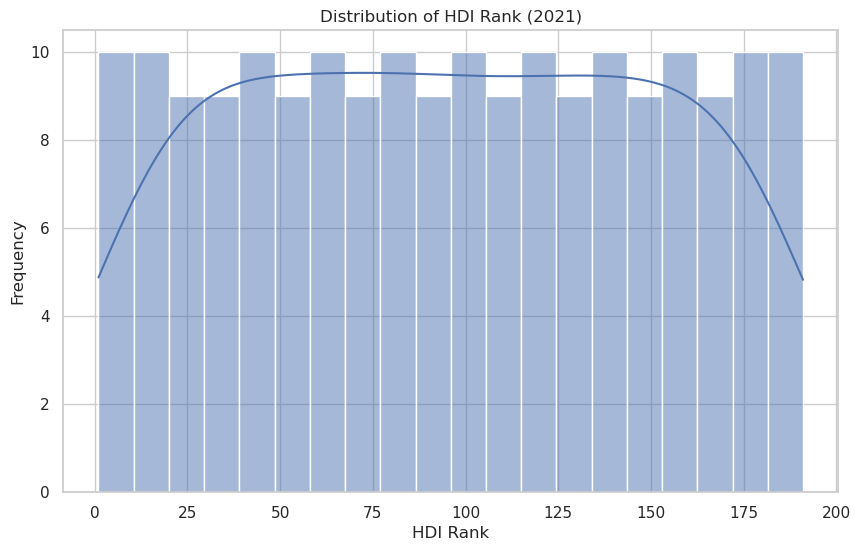

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of plots
sns.set(style='whitegrid')

# Create a histogram of HDI Rank
plt.figure(figsize=(10, 6))
sns.histplot(data['HDI Rank (2021)'], bins=20, kde=True)
plt.title('Distribution of HDI Rank (2021)')
plt.xlabel('HDI Rank')
plt.ylabel('Frequency')
plt.show()

## Categorical Plots

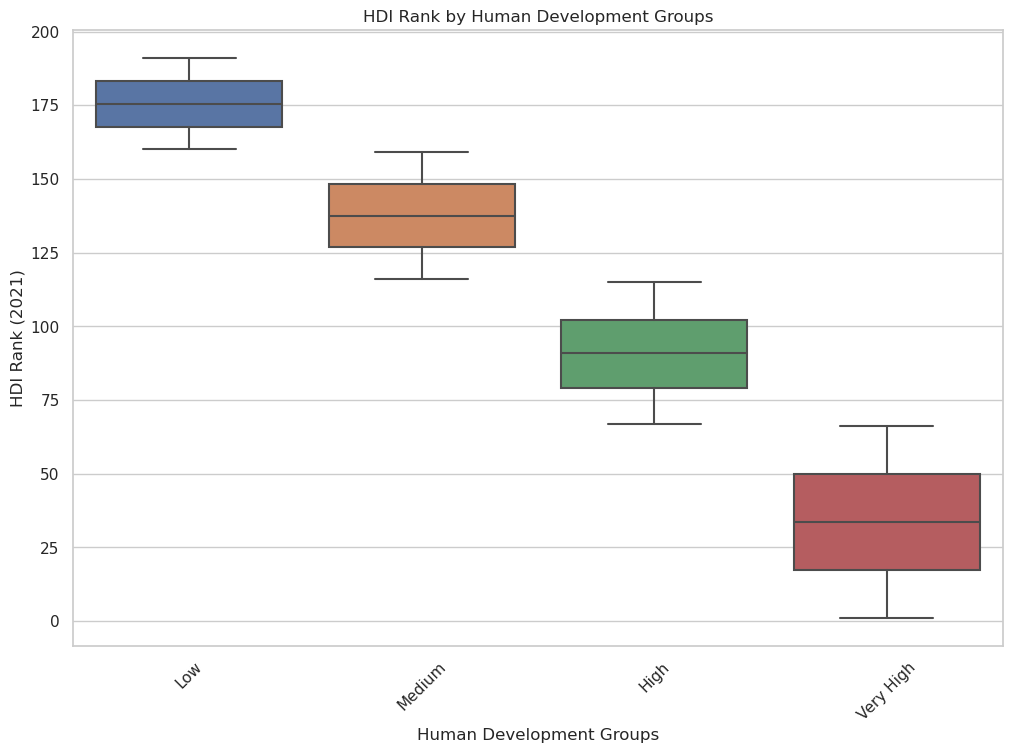

In [4]:
# Create a box plot of HDI Rank by Human Development Groups
plt.figure(figsize=(12, 8))
sns.boxplot(x='Human Development Groups', y='HDI Rank (2021)', data=data)
plt.title('HDI Rank by Human Development Groups')
plt.xticks(rotation=45)
plt.show()


## Relationship Plots

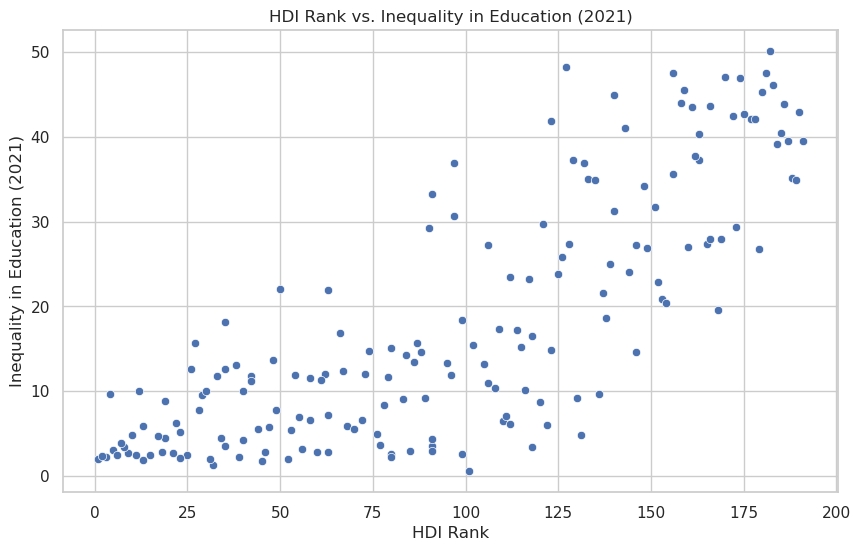

In [5]:
# Create a scatter plot of HDI Rank vs. Inequality in Education (2021)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HDI Rank (2021)', y='Inequality in Education (2021)', data=data)
plt.title('HDI Rank vs. Inequality in Education (2021)')
plt.xlabel('HDI Rank')
plt.ylabel('Inequality in Education (2021)')
plt.show()


## Heatmaps

/tmp/ipykernel_20/2240262491.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


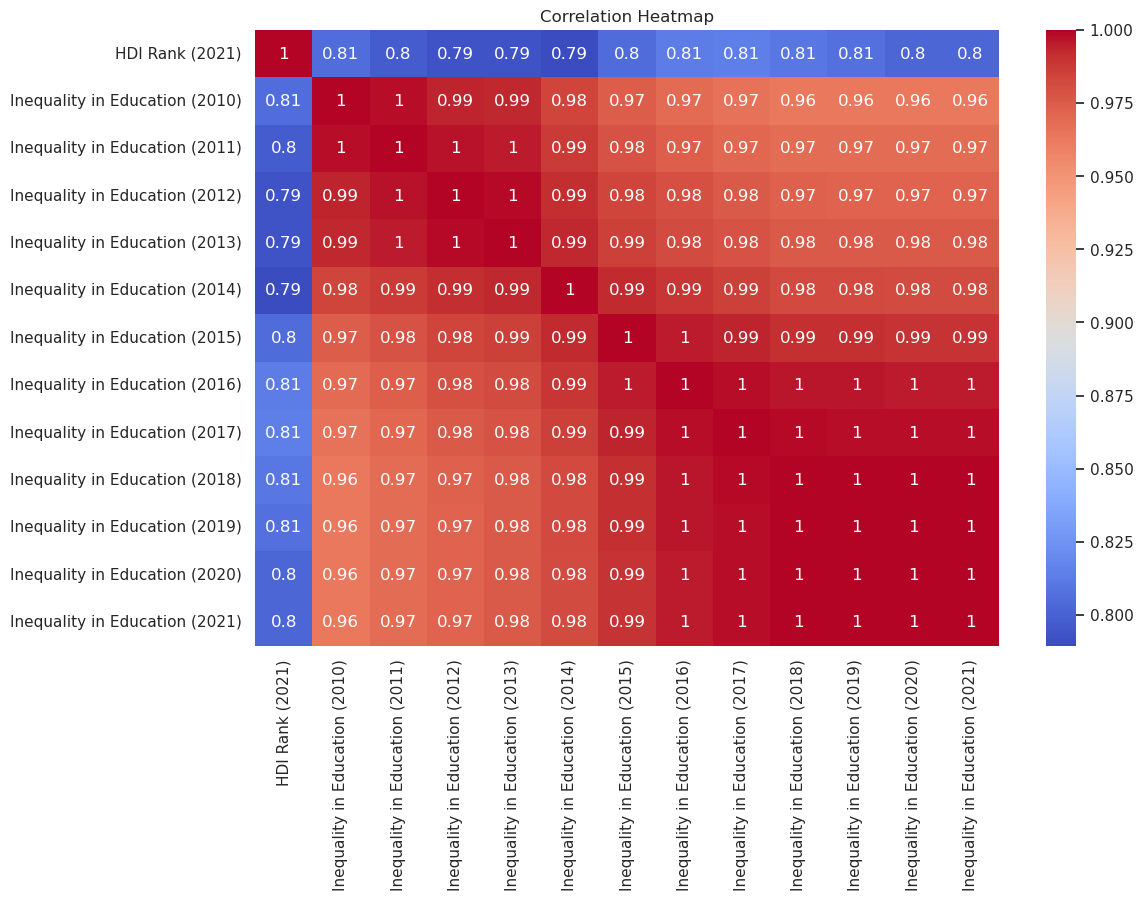

In [6]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Pair Plots

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


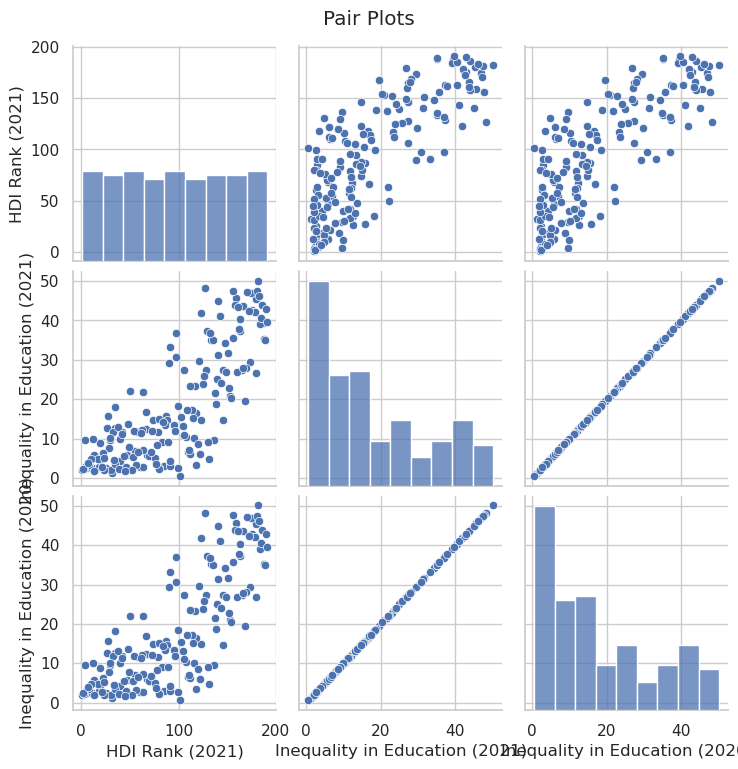

In [7]:
# Create pair plots for a subset of variables
sns.pairplot(data[['HDI Rank (2021)', 'Inequality in Education (2021)', 'Inequality in Education (2020)']])
plt.suptitle('Pair Plots', y=1.02)
plt.show()


## Customizing Seaborn Plots

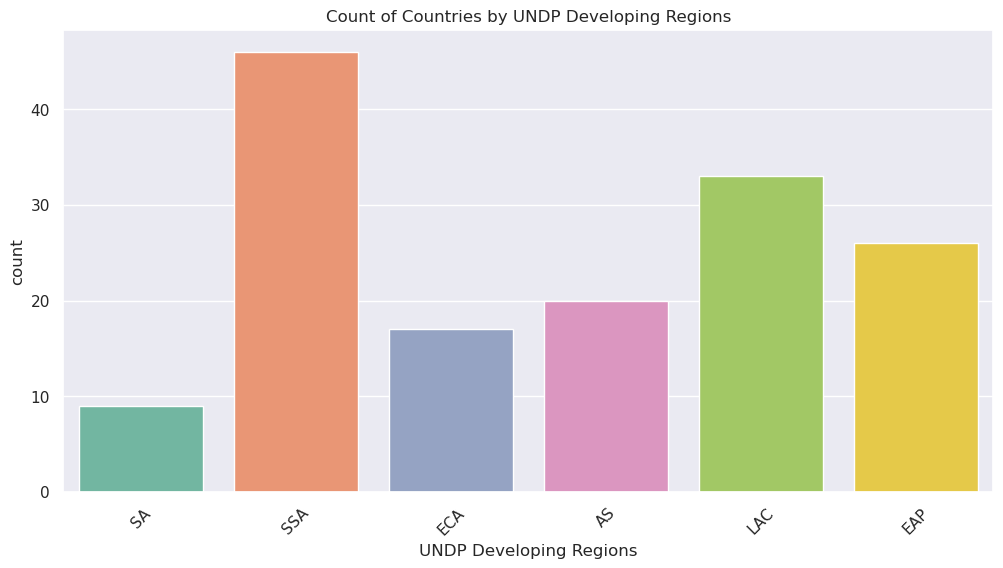

In [8]:
# Customize the style and color palette
sns.set(style='darkgrid', palette='Set2')

# Create a bar plot of UNDP Developing Regions
plt.figure(figsize=(12, 6))
sns.countplot(x='UNDP Developing Regions', data=data)
plt.title('Count of Countries by UNDP Developing Regions')
plt.xticks(rotation=45)
plt.show()


# Advanced Visualization Techniques

## Facet Grids

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


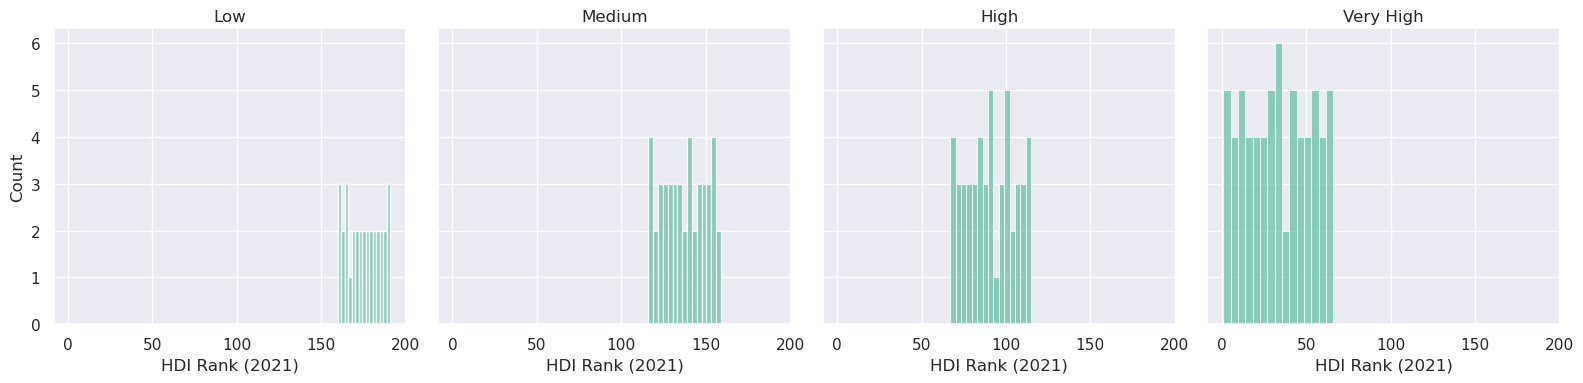

In [9]:
# Create a facet grid of histograms by Human Development Groups
g = sns.FacetGrid(data, col='Human Development Groups', height=4)
g.map_dataframe(sns.histplot, x='HDI Rank (2021)', bins=15)
g.set_titles(col_template='{col_name}')
plt.show()


## Joint Plots

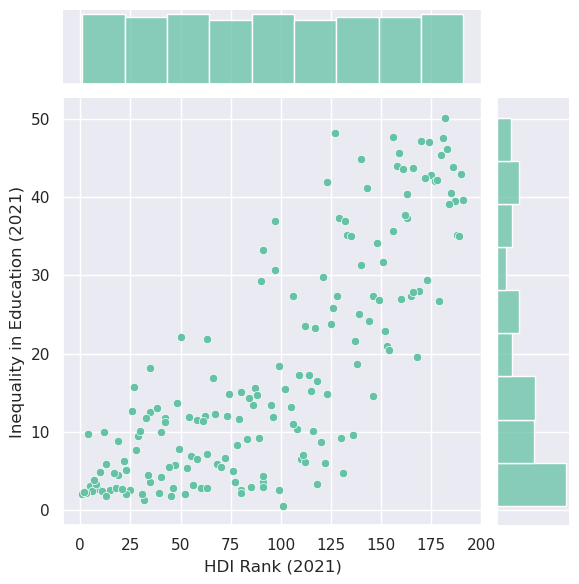

In [10]:
# Create a joint plot of HDI Rank vs. Inequality in Education (2021)
sns.jointplot(x='HDI Rank (2021)', y='Inequality in Education (2021)', data=data, kind='scatter')
plt.show()


## Regression Plots

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


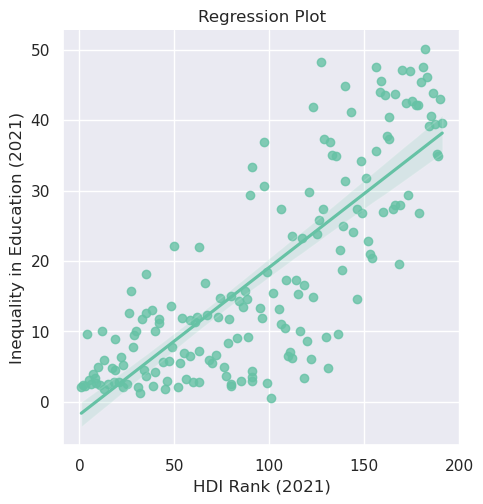

In [11]:
# Create a regression plot of HDI Rank vs. Inequality in Education (2021)
sns.lmplot(x='HDI Rank (2021)', y='Inequality in Education (2021)', data=data)
plt.title('Regression Plot')
plt.show()


# Conclusion

Seaborn is a versatile and powerful library that offers a wide range of visualization tools to gain insights from your data. Whether you're exploring distributions, relationships, or patterns, Seaborn's intuitive syntax and beautiful visualizations make it an essential tool for any data scientist or analyst. By mastering Seaborn's capabilities, you can tell compelling stories and make data-driven decisions with confidence.